### Descenso de Gradiente - Matemática 4 UNLP

En este ejercicio, implementaremos un algoritmo de **descenso de gradiente** para minimizar una función cuadrática simple definida como:

$$ f(x) = \frac{1}{2}x^2 + \frac{3}{2} $$

### Parámetros Utilizados

- **Punto inicial (`x_prev`)**: El valor inicial desde el cual comenzará el descenso de gradiente. En este caso, se establece en `1.4`.
  
- **Tolerancia (`tol`)**: El criterio de parada (freno) del algoritmo, que define la mínima diferencia aceptable entre las evaluaciones consecutivas de la función. Aquí se usa `tol = 0.01`.

- **Tamaño de paso (`step`)**: El tamaño del paso (también conocido como _learning rate_) utilizado para actualizar la posición en cada iteración. Un valor adecuado de η asegura que el algoritmo converja de manera eficiente al mínimo, sin oscilar ni diverger. Una tasa de aprendizaje demasiado alta puede hacer que el algoritmo no converja, mientras que una tasa demasiado baja puede hacer que la convergencia sea muy lenta. Se establece en `step = 0.4`.

- **Derivada de la función (`df`)**: La derivada de la función, que en este caso es `df(x) = x`, se utiliza para calcular la dirección del descenso.

### Objetivo

El objetivo del algoritmo es iterar hasta encontrar el valor de `x` que minimiza la función `f(x)`, dentro de la tolerancia establecida. Cada iteración se representará gráficamente para visualizar el progreso del descenso de gradiente.

Al final, se generará un gráfico que mostrará la función cuadrática junto con los puntos evaluados en cada iteración, y se imprimirá una tabla con los valores de `x` y `f(x)` para cada paso del algoritmo.

Además, se calculará el tiempo de ejecución para demostrar cómo se altera con diferentes tolerancias y steps.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

 iteration     prev      new     fnew    error
         1 1.400000 0.840000 1.852800 0.627200
         2 0.840000 0.504000 1.627008 0.225792
         3 0.504000 0.302400 1.545723 0.081285
         4 0.302400 0.181440 1.516460 0.029263
         5 0.181440 0.108864 1.505926 0.010535
         6 0.108864 0.065318 1.502133 0.003792
Tiempo de ejecución: 0.0876 segundos


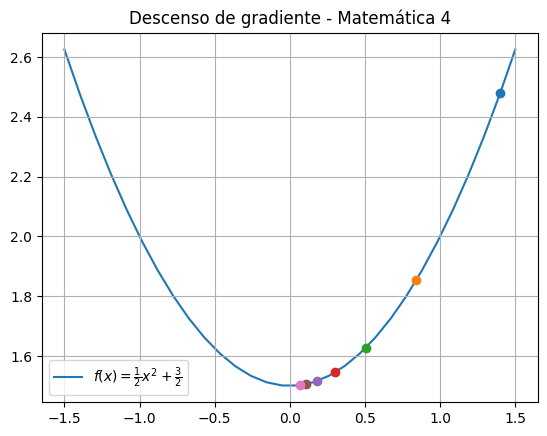

In [2]:
inicio = time.process_time() # inicio conteo de tiempo de ejecución

def add_row(data: dict, iteration, prev, new, fnew, error):
    data['iteration'].append(iteration)
    data['prev'].append(prev)
    data['new'].append(new)
    data['fnew'].append(fnew)
    data['error'].append(error)

X = np.linspace(-1.5, 1.5, 30)

# función y derivada
f = lambda x: 0.5 * x**2 + 1.5
df = lambda x: x
x_prev = 1.4 # valor inicial
tol = 0.01 # tolerancia
step = 0.4 # learning rate (taza de aprendizaje)
iteration = 1
data = {'iteration': [], 'prev': [], 'new': [], 'fnew': [], 'error': []}

# creo el gráfico
fig, ax = plt.subplots()
ax.plot(X, f(X), label=r'$f(x)=\frac{1}{2}x^2 + \frac{3}{2}$', zorder=1)
plt.grid(True)
ax.scatter(x_prev, f(x_prev), zorder=2)
ax.set_title("Descenso de gradiente - Matemática 4")


# solo comienza el algoritmo si no estamos en el mínimo
if df(x_prev) != 0:
    f_prev = f(x_prev)
    x_new = x_prev - step * df(x_prev)
    f_new = f(x_new)
    error = abs(f_new - f_prev)
    add_row(data, iteration, x_prev, x_new, f_new, error)

    while error > tol:
        iteration += 1
        x_prev, f_prev = x_new, f_new
        x_new = x_prev - step * df(x_prev)
        f_new = f(x_new)
        error = abs(f_new - f_prev)
        add_row(data, iteration, x_prev, x_new, f_new, error)

# creo el DataFrame y añado puntos al gráfico
df = pd.DataFrame(data)

for idx, row in enumerate(df.itertuples()):
    ax.scatter(row.new, row.fnew, zorder=2)

ax.legend()

print(df.to_string(index=False))

fin = time.process_time() # finalizo conteo de tiempo de ejecución
print(f"Tiempo de ejecución: {fin - inicio:.4f} segundos")

## Impacto de la Tolerancia en el Descenso de Gradiente

**Reducir la Tolerancia**:
- **Más Iteraciones**: Una menor tolerancia requiere más iteraciones para que el algoritmo se considere convergido (estado estable). El algoritmo continuará ejecutándose hasta que la diferencia en los valores de la función objetivo entre iteraciones consecutivas sea menor que la tolerancia establecida.
- **Mayor Precisión**: Con una tolerancia más baja, el algoritmo realiza ajustes más precisos, acercándose más al mínimo exacto de la función. Esto mejora la precisión de la solución final.
- **Mayor Tiempo de Ejecución**: Más iteraciones implican un mayor tiempo de cómputo, ya que se requieren más cálculos para alcanzar la tolerancia más estricta.

**Aumentar la Tolerancia**:
- **Menos Iteraciones**: Una mayor tolerancia permite que el algoritmo converja con menos iteraciones, ya que el umbral de error aceptable es mayor. Esto significa que el algoritmo se detiene antes, con menos actualizaciones.
- **Menor Precisión**: Con una tolerancia más alta, el algoritmo puede detenerse antes de alcanzar el mínimo exacto, lo que puede resultar en una solución menos precisa.
- **Menor Tiempo de Ejecución**: Menos iteraciones reducen el tiempo de cómputo, ya que se realizan menos cálculos para alcanzar la tolerancia más relajada.

**Balance Necesario**:
Encontrar un equilibrio adecuado entre la tolerancia y el tiempo de ejecución es crucial. Reducir la tolerancia mejora la precisión pero aumenta el tiempo de ejecución, mientras que aumentar la tolerancia reduce el tiempo de cómputo pero puede afectar la precisión. Ajustar la tolerancia permite optimizar el balance entre precisión y tiempo de ejecución según los requisitos específicos del problema.








Veamos qué pasa si disminuímos la tolerancia:

 iteration         prev          new     fnew        error
         1 1.400000e+00 8.400000e-01 1.852800 6.272000e-01
         2 8.400000e-01 5.040000e-01 1.627008 2.257920e-01
         3 5.040000e-01 3.024000e-01 1.545723 8.128512e-02
         4 3.024000e-01 1.814400e-01 1.516460 2.926264e-02
         5 1.814400e-01 1.088640e-01 1.505926 1.053455e-02
         6 1.088640e-01 6.531840e-02 1.502133 3.792439e-03
         7 6.531840e-02 3.919104e-02 1.500768 1.365278e-03
         8 3.919104e-02 2.351462e-02 1.500276 4.915000e-04
         9 2.351462e-02 1.410877e-02 1.500100 1.769400e-04
        10 1.410877e-02 8.465265e-03 1.500036 6.369840e-05
        11 8.465265e-03 5.079159e-03 1.500013 2.293143e-05
        12 5.079159e-03 3.047495e-03 1.500005 8.255313e-06
        13 3.047495e-03 1.828497e-03 1.500002 2.971913e-06
        14 1.828497e-03 1.097098e-03 1.500001 1.069889e-06
        15 1.097098e-03 6.582590e-04 1.500000 3.851599e-07
        16 6.582590e-04 3.949554e-04 1.500000 1.386576e-

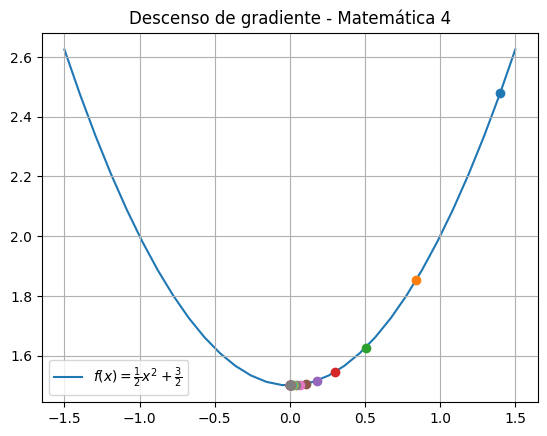

In [3]:
inicio = time.process_time() # inicio conteo de tiempo de ejecución

def add_row(data: dict, iteration, prev, new, fnew, error):
    data['iteration'].append(iteration)
    data['prev'].append(prev)
    data['new'].append(new)
    data['fnew'].append(fnew)
    data['error'].append(error)

X = np.linspace(-1.5, 1.5, 30)

# función y derivada
f = lambda x: 0.5 * x**2 + 1.5
df = lambda x: x
x_prev = 1.4 # valor inicial
tol = 0.000000000000000001 # tolerancia
step = 0.4 # learning rate (taza de aprendizaje)
iteration = 1
data = {'iteration': [], 'prev': [], 'new': [], 'fnew': [], 'error': []}

# creo el gráfico
fig, ax = plt.subplots()
ax.plot(X, f(X), label=r'$f(x)=\frac{1}{2}x^2 + \frac{3}{2}$', zorder=1)
plt.grid(True)
ax.scatter(x_prev, f(x_prev), zorder=2)
ax.set_title("Descenso de gradiente - Matemática 4")


# solo comienza el algoritmo si no estamos en el mínimo
if df(x_prev) != 0:
    f_prev = f(x_prev)
    x_new = x_prev - step * df(x_prev)
    f_new = f(x_new)
    error = abs(f_new - f_prev)
    add_row(data, iteration, x_prev, x_new, f_new, error)

    while error > tol:
        iteration += 1
        x_prev, f_prev = x_new, f_new
        x_new = x_prev - step * df(x_prev)
        f_new = f(x_new)
        error = abs(f_new - f_prev)
        add_row(data, iteration, x_prev, x_new, f_new, error)

# creo el DataFrame y añado puntos al gráfico
df = pd.DataFrame(data)

for idx, row in enumerate(df.itertuples()):
    ax.scatter(row.new, row.fnew, zorder=2)

ax.legend()

print(df.to_string(index=False))

fin = time.process_time() # finalizo conteo de tiempo de ejecución
print(f"Tiempo de ejecución: {fin - inicio:.4f} segundos")

Veamos qué pasa si aumentamos la tolerancia:

 iteration  prev    new     fnew    error
         1 1.400 0.8400 1.852800 0.627200
         2 0.840 0.5040 1.627008 0.225792
         3 0.504 0.3024 1.545723 0.081285
Tiempo de ejecución: 0.0653 segundos


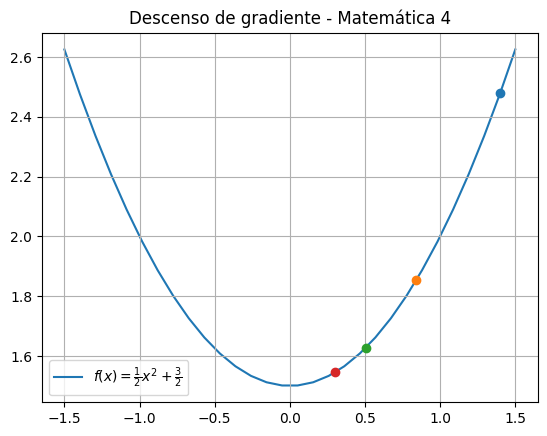

In [4]:
inicio = time.process_time() # inicio conteo de tiempo de ejecución

def add_row(data: dict, iteration, prev, new, fnew, error):
    data['iteration'].append(iteration)
    data['prev'].append(prev)
    data['new'].append(new)
    data['fnew'].append(fnew)
    data['error'].append(error)

X = np.linspace(-1.5, 1.5, 30)

# función y derivada
f = lambda x: 0.5 * x**2 + 1.5
df = lambda x: x
x_prev = 1.4 # valor inicial
tol = 0.1 # tolerancia
step = 0.4 # learning rate (taza de aprendizaje)
iteration = 1
data = {'iteration': [], 'prev': [], 'new': [], 'fnew': [], 'error': []}

# creo el gráfico
fig2, ax = plt.subplots()
ax.plot(X, f(X), label=r'$f(x)=\frac{1}{2}x^2 + \frac{3}{2}$', zorder=1)
plt.grid(True)
ax.scatter(x_prev, f(x_prev), zorder=2)
ax.set_title("Descenso de gradiente - Matemática 4")


# solo comienza el algoritmo si no estamos en el mínimo
if df(x_prev) != 0:
    f_prev = f(x_prev)
    x_new = x_prev - step * df(x_prev)
    f_new = f(x_new)
    error = abs(f_new - f_prev)
    add_row(data, iteration, x_prev, x_new, f_new, error)

    while error > tol:
        iteration += 1
        x_prev, f_prev = x_new, f_new
        x_new = x_prev - step * df(x_prev)
        f_new = f(x_new)
        error = abs(f_new - f_prev)
        add_row(data, iteration, x_prev, x_new, f_new, error)

# creo el DataFrame y añado puntos al gráfico
df = pd.DataFrame(data)

for idx, row in enumerate(df.itertuples()):
    ax.scatter(row.new, row.fnew, zorder=2)

ax.legend()

print(df.to_string(index=False))

fin = time.process_time() # finalizo conteo de tiempo de ejecución
print(f"Tiempo de ejecución: {fin - inicio:.4f} segundos")

 iteration     prev      new      fnew    error
         1 3.641593 3.992626 -0.751962 0.272536
         2 3.992626 4.256308 -0.897786 0.145824
         3 4.256308 4.432481 -0.961081 0.063295
         4 4.432481 4.542988 -0.985686 0.024605
Tiempo de ejecución: 0.0595 segundos


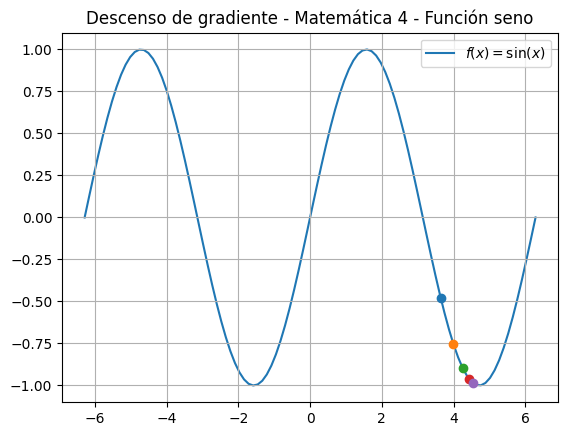

In [5]:
inicio = time.process_time() # inicio conteo de tiempo de ejecución

def add_row(data: dict, iteration, prev, new, fnew, error):
    data['iteration'].append(iteration)
    data['prev'].append(prev)
    data['new'].append(new)
    data['fnew'].append(fnew)
    data['error'].append(error)

X = np.linspace(-2 * np.pi, 2 * np.pi, 100)

# función y derivada
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)

x_prev =  np.pi + 0.5 # valor inicial
tol = 0.05 # tolerancia
step = 0.4 # learning rate (tasa de aprendizaje)
iteration = 1
data = {'iteration': [], 'prev': [], 'new': [], 'fnew': [], 'error': []}

# creo el gráfico
fig, ax = plt.subplots()
ax.plot(X, f(X), label=r'$f(x)=\sin(x)$', zorder=1)
ax.scatter(x_prev, f(x_prev), zorder=2)
ax.set_title("Descenso de gradiente - Matemática 4 - Función seno")
plt.grid(True)

# solo comienza el algoritmo si no estamos en un punto crítico (mínimo o máximo)
if df(x_prev) != 0:
    f_prev = f(x_prev)
    x_new = x_prev - step * df(x_prev)
    f_new = f(x_new)
    error = abs(f_new - f_prev)
    add_row(data, iteration, x_prev, x_new, f_new, error)

    while error > tol:
        iteration += 1
        x_prev, f_prev = x_new, f_new
        x_new = x_prev - step * df(x_prev)
        f_new = f(x_new)
        error = abs(f_new - f_prev)
        add_row(data, iteration, x_prev, x_new, f_new, error)

# creo el DataFrame y añado puntos al gráfico
df = pd.DataFrame(data)

for idx, row in enumerate(df.itertuples()):
    ax.scatter(row.new, row.fnew, zorder=2)

ax.legend()

print(df.to_string(index=False))

fin = time.process_time() # finalizo conteo de tiempo de ejecución
print(f"Tiempo de ejecución: {fin - inicio:.4f} segundos")

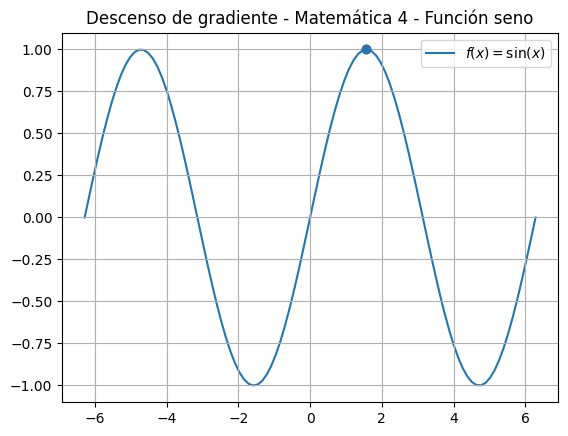

 iteration     prev      new  fnew  error
         1 1.570796 1.570796   1.0    0.0
Tiempo de ejecución: 0.5561 segundos


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

inicio = time.process_time()  # inicio conteo de tiempo de ejecución

def add_row(data: dict, iteration, prev, new, fnew, error):
    data['iteration'].append(iteration)
    data['prev'].append(prev)
    data['new'].append(new)
    data['fnew'].append(fnew)
    data['error'].append(error)

# rango de valores de x para el gráfico
X = np.linspace(-2 * np.pi, 2 * np.pi, 100)

# función y derivada
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)

x_prev = np.pi / 2 #2 * np.pi - 0.5  # valor inicial
tol = 0.01  # tolerancia
step = 0.4 # learning rate (taza de aprendizaje)
iteration = 1
data = {'iteration': [], 'prev': [], 'new': [], 'fnew': [], 'error': []}

# creo el gráfico
fig, ax = plt.subplots()
ax.plot(X, f(X), label=r'$f(x)=\sin(x)$', zorder=1)
ax.scatter(x_prev, f(x_prev), color='red', zorder=2)  # Valor inicial
ax.set_title("Descenso de gradiente - Matemática 4 - Función seno")
plt.grid(True)

# solo comienza el algoritmo si no estamos en un punto crítico (mínimo o máximo)
if df(x_prev) != 0 or True:
    f_prev = f(x_prev)
    x_new = x_prev - step * df(x_prev)
    f_new = f(x_new)
    error = abs(f_new - f_prev)
    add_row(data, iteration, x_prev, x_new, f_new, error)

    while error > tol:
        iteration += 1
        x_prev, f_prev = x_new, f_new
        x_new = x_prev - step * df(x_prev)
        f_new = f(x_new)
        error = abs(f_new - f_prev)
        add_row(data, iteration, x_prev, x_new, f_new, error)

# creo el DataFrame y añado puntos al gráfico
df = pd.DataFrame(data)

for idx, row in enumerate(df.itertuples()):
    ax.scatter(row.new, row.fnew, zorder=2)

ax.legend()
plt.show()

print(df.to_string(index=False))

fin = time.process_time()  # finalizo conteo de tiempo de ejecución
print(f"Tiempo de ejecución: {fin - inicio:.4f} segundos")